# Multi-class classification

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128,verbose=0)
score = model.evaluate(x_test, y_test, batch_size=128,verbose=0)
print score[1]*100

Using CNTK backend
E:\Anaconda2\lib\site-packages\keras\backend\cntk_backend.py:19: UserWarning: CNTK backend warning: GPU is not detected. CNTK's CPU version is not fully optimized,please run with GPU to get better performance.
  'CNTK backend warning: GPU is not detected. '
E:\Anaconda2\lib\site-packages\cntk\core.py:351: UserWarning: your data is of type "float64", but your input variable (uid "Input4") expects "<type 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))
E:\Anaconda2\lib\site-packages\cntk\core.py:351: UserWarning: your data is of type "float64", but your input variable (uid "Input67") expects "<type 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


10.9999999404


## Model visualization
Need to install graphicviz from official website and add its /bin into environmental variable $PATH

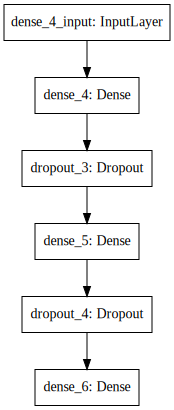

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Binary Classification

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128,verbose=0)
score = model.evaluate(x_test, y_test, batch_size=128,verbose=0)
print score[1]*100

E:\Anaconda2\lib\site-packages\cntk\core.py:351: UserWarning: your data is of type "float64", but your input variable (uid "Input536") expects "<type 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


55.0000011921


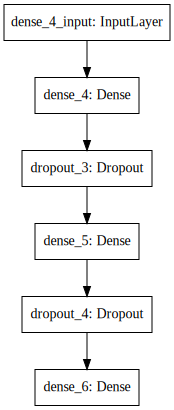

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

# VGG-like convnet

In [20]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD


x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

from keras.utils import plot_model
plot_model(model, to_file='VGG.png',show_shapes=True,show_layer_names=False)

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10,verbose=0)
score = model.evaluate(x_test, y_test, batch_size=32,verbose=0)
print score[1]*100

# Sequence classification with 1D convolutions

In [1]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

samplesize = 1000
x_train = np.random.random((samplesize, 100, 100))
y_train = np.random.randint(2, size=(samplesize, 1))
x_test = np.random.random((20, 100, 100))
y_test = np.random.randint(2, size=(20, 1))

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(100, 100)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=16, epochs=10,verbose=0)
score = model.evaluate(x_test, y_test, batch_size=16, verbose=0)
print score

from keras.utils import plot_model
plot_model(model, to_file='sc1c.png',show_shapes=True,show_layer_names=False)

Using CNTK backend
E:\Anaconda2\lib\site-packages\keras\backend\cntk_backend.py:19: UserWarning: CNTK backend warning: GPU is not detected. CNTK's CPU version is not fully optimized,please run with GPU to get better performance.
  'CNTK backend warning: GPU is not detected. '
E:\Anaconda2\lib\site-packages\cntk\core.py:351: UserWarning: your data is of type "float64", but your input variable (uid "Input4") expects "<type 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


[0.6910078644752502, 0.65000000000000002]


# Stacked LSTM

In [2]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

batchsize = 1000
data_dim = 16
timesteps = 8
num_classes = 10

x_train = np.random.random((batchsize, timesteps, data_dim)).astype('float32')
y_train = keras.utils.to_categorical(np.random.randint(num_classes, size=(batchsize, 1)), num_classes=num_classes).astype('float32')
x_test = np.random.random((20, timesteps, data_dim)).astype('float32')
y_test = keras.utils.to_categorical(np.random.randint(num_classes, size=(20, 1)), num_classes=num_classes).astype('float32')

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=64, epochs=5, verbose=0)
score = model.evaluate(x_test, y_test, batch_size=16, verbose=0)
print score[1]*100

10.0


# RNN

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 10
batch_size = 32

model = Sequential()
model.add(LSTM(32, return_sequences=True, stateful=True,
               batch_input_shape=(batch_size, timesteps, data_dim)))
model.add(LSTM(32, return_sequences=True, stateful=True))
model.add(LSTM(32, stateful=True))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Generate dummy training data
x_train = np.random.random((batch_size * 10, timesteps, data_dim))
y_train = np.random.random((batch_size * 10, num_classes))

# Generate dummy validation data
x_val = np.random.random((batch_size * 3, timesteps, data_dim))
y_val = np.random.random((batch_size * 3, num_classes))

model.fit(x_train, y_train,
          batch_size=batch_size, epochs=5, shuffle=False,verbose=1)
score = model.evaluate(x_val, y_val, batch_size=16, verbose=0)
print score[1]*100

In [2]:
import numpy 
id(numpy.dot) == id(numpy.core.multiarray.dot) 

True

# Keras API

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Using Theano backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1344      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________
